<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/pop_by_delta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import altair as alt
from vega_datasets import data
flatten = lambda l: [item for sublist in l for item in sublist]
'''
delta from https://data.worldbank.org/indicator/SP.POP.GROW

pop from https://data.worldbank.org/indicator/SP.POP.TOTL

'''

'\ndelta from https://data.worldbank.org/indicator/SP.POP.GROW\n\npop from https://data.worldbank.org/indicator/SP.POP.TOTL\n\n'

In [0]:
def pop_and_delta(country):
    
    src_pop = "base_pops/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv"
    src_delta = "API_SP.POP.GROW_DS2_en_csv_v2_10182032.csv"
    
    columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code']
    column_names = ['year', 'pop', 'delta_pop']
    
    df_pop = pd.read_csv(src_pop, header=2).drop(columns=columns_to_drop)
    df_delta = pd.read_csv(src_delta, header=2).drop(columns=columns_to_drop)
    
    df_pop.rename(columns={'Country Name': 'country'}, inplace=True)
    df_delta.rename(columns={'Country Name': 'country'}, inplace=True)
    
    country_pop =  df_pop[df_pop['country']==country].T
    country_delta =  df_delta[df_delta['country']==country].T
    
    years = pd.DataFrame(country_pop.iloc[1:]).index.values
    
    country_pop = flatten(pd.DataFrame(country_pop.iloc[1:]).values)
    country_delta = flatten(pd.DataFrame(country_delta.iloc[1:]).values)
    
    # country_delta.map(lambda x: x * 0.01, inplace=True)
    country_delta = [x * 0.01 for x in country_delta]
    # print(country_delta.values)
    
    country_df = pd.DataFrame({column_names[0]: years, 
                              column_names[1]: country_pop, 
                              column_names[2]: country_delta})
    
    return country_df

In [0]:
pop_and_delta('Pakistan').head()

,year,pop,delta_pop
0,1960,44908293.0,0.022914
1,1961,45984892.0,0.023690
2,1962,47119361.0,0.024371
3,1963,48309315.0,0.024940
4,1964,49551904.0,0.025396


In [0]:
def show_pop_w_delta(country_df):
    
    interval = alt.selection_interval(encodings=['x'])
    column_names = ['year', 'pop', 'delta_pop']
    
    chart_pop = alt.Chart(country_df, width=800).mark_bar(color='black').encode(
        x=alt.X('pop',  scale=alt.Scale(domain=(country_df[column_names[1]].min(), country_df[column_names[1]].max()))),
        y=alt.Y('year', axis=alt.Axis(title='Year')),
        #y='year'
        tooltip='delta_pop'
        ).transform_filter(
            interval
        )
        
    chart_delta = alt.Chart(country_df, width=800).mark_line(color='black').encode(
        x=alt.X('year', axis=alt.Axis(title='Year')),
        y=alt.Y('delta_pop', axis=alt.Axis(format='%', title='Change in Population'))
        # y='delta_pop'
        # tooltip='pop'
        ).properties(
            selection=interval
        )
    
    return chart_delta & chart_pop

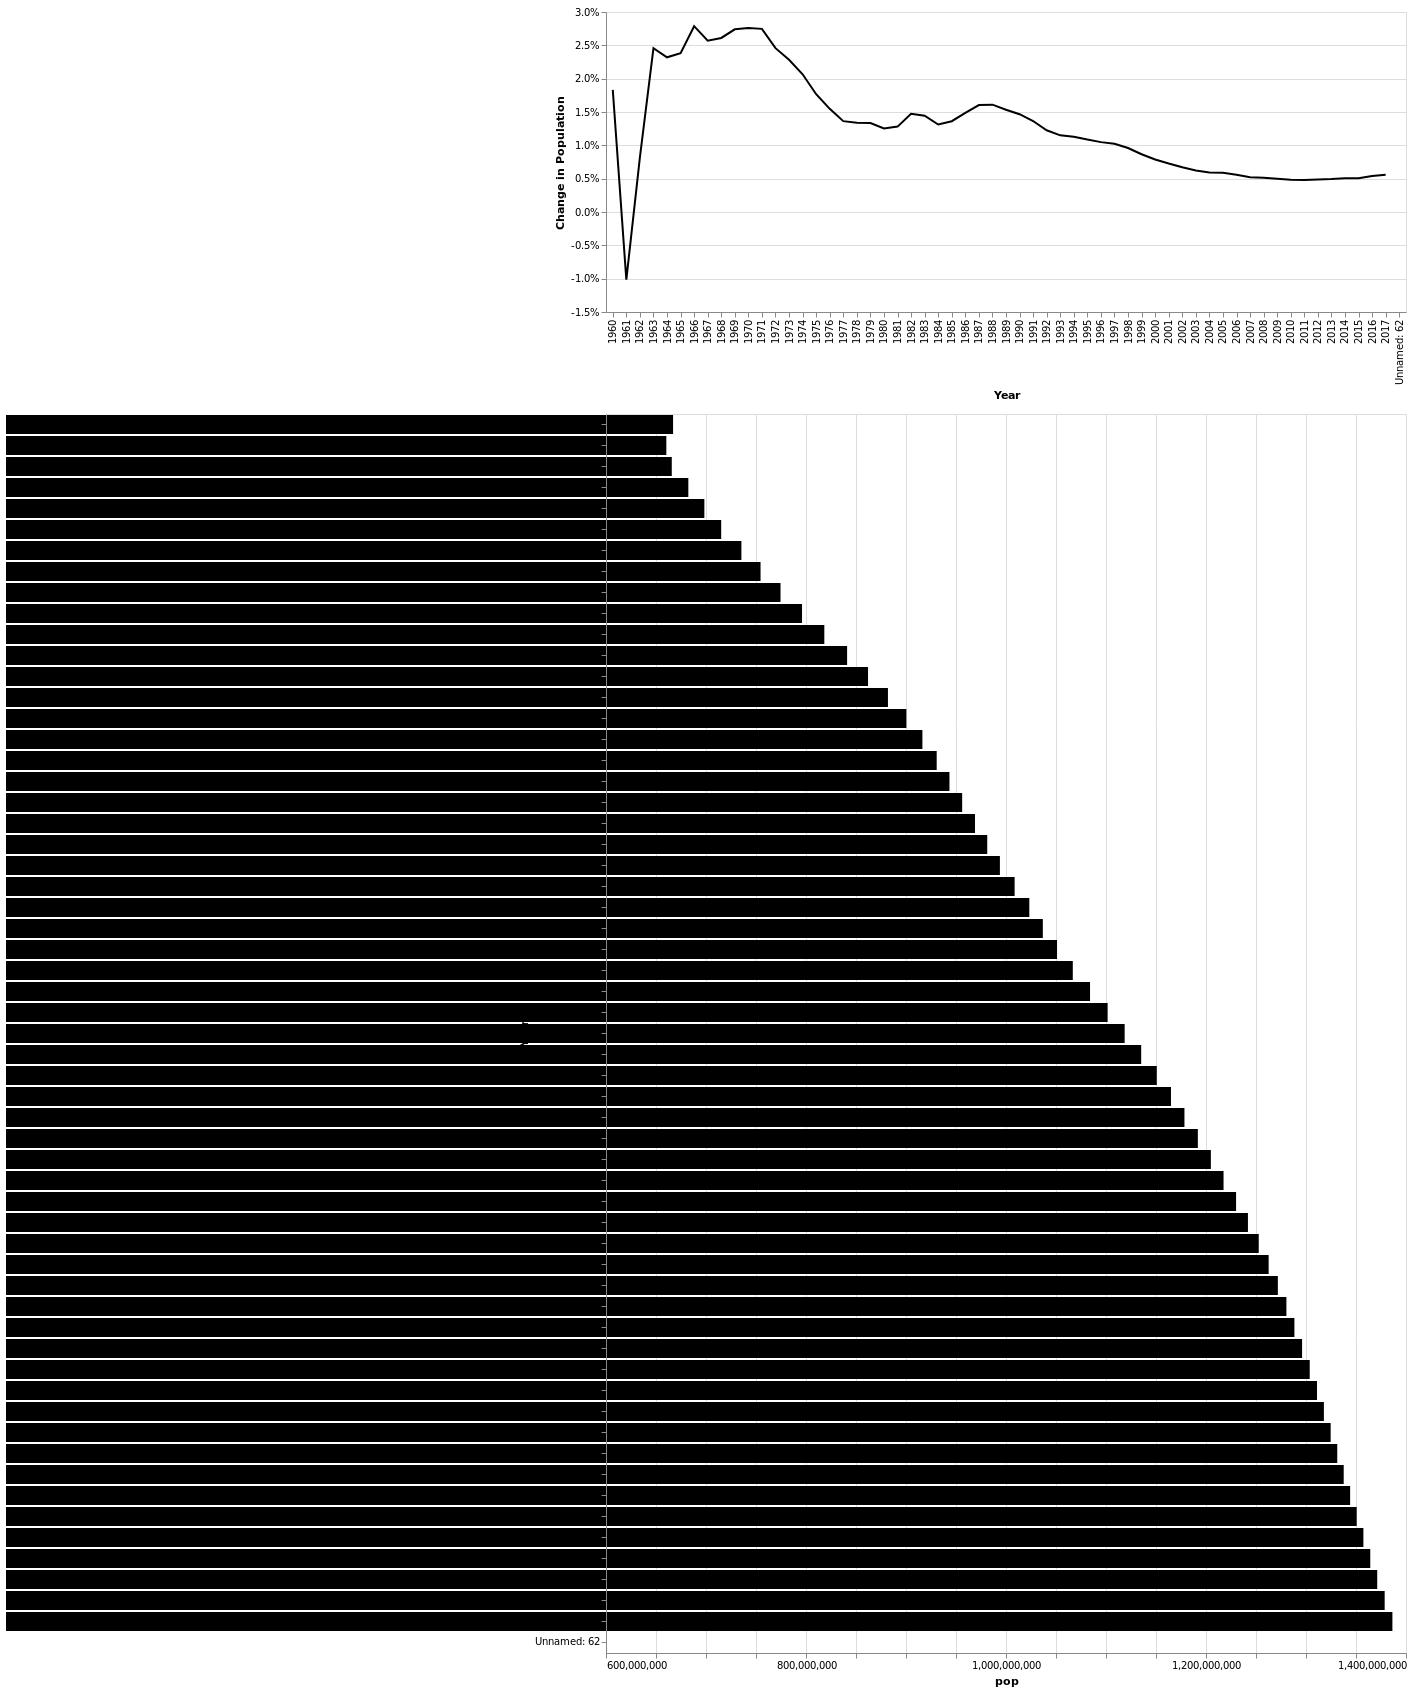

In [0]:
show_pop_w_delta(pop_and_delta('China'))

In [0]:
'''
def main(country):
    flatten = lambda l: [item for sublist in l for item in sublist]
    
    src_pop = "base_pops/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv"
    src_delta = "API_SP.POP.GROW_DS2_en_csv_v2_10182032.csv"
    
    columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code']
    column_names = ['year', 'pop', 'delta_pop']
    
    df_pop = pd.read_csv(src_pop, header=2).drop(columns=columns_to_drop)
    df_delta = pd.read_csv(src_delta, header=2).drop(columns=columns_to_drop)
    
    df_pop.rename(columns={'Country Name': 'country'}, inplace=True)
    df_delta.rename(columns={'Country Name': 'country'}, inplace=True)
    
    pop_and_delta(country).head()
'''

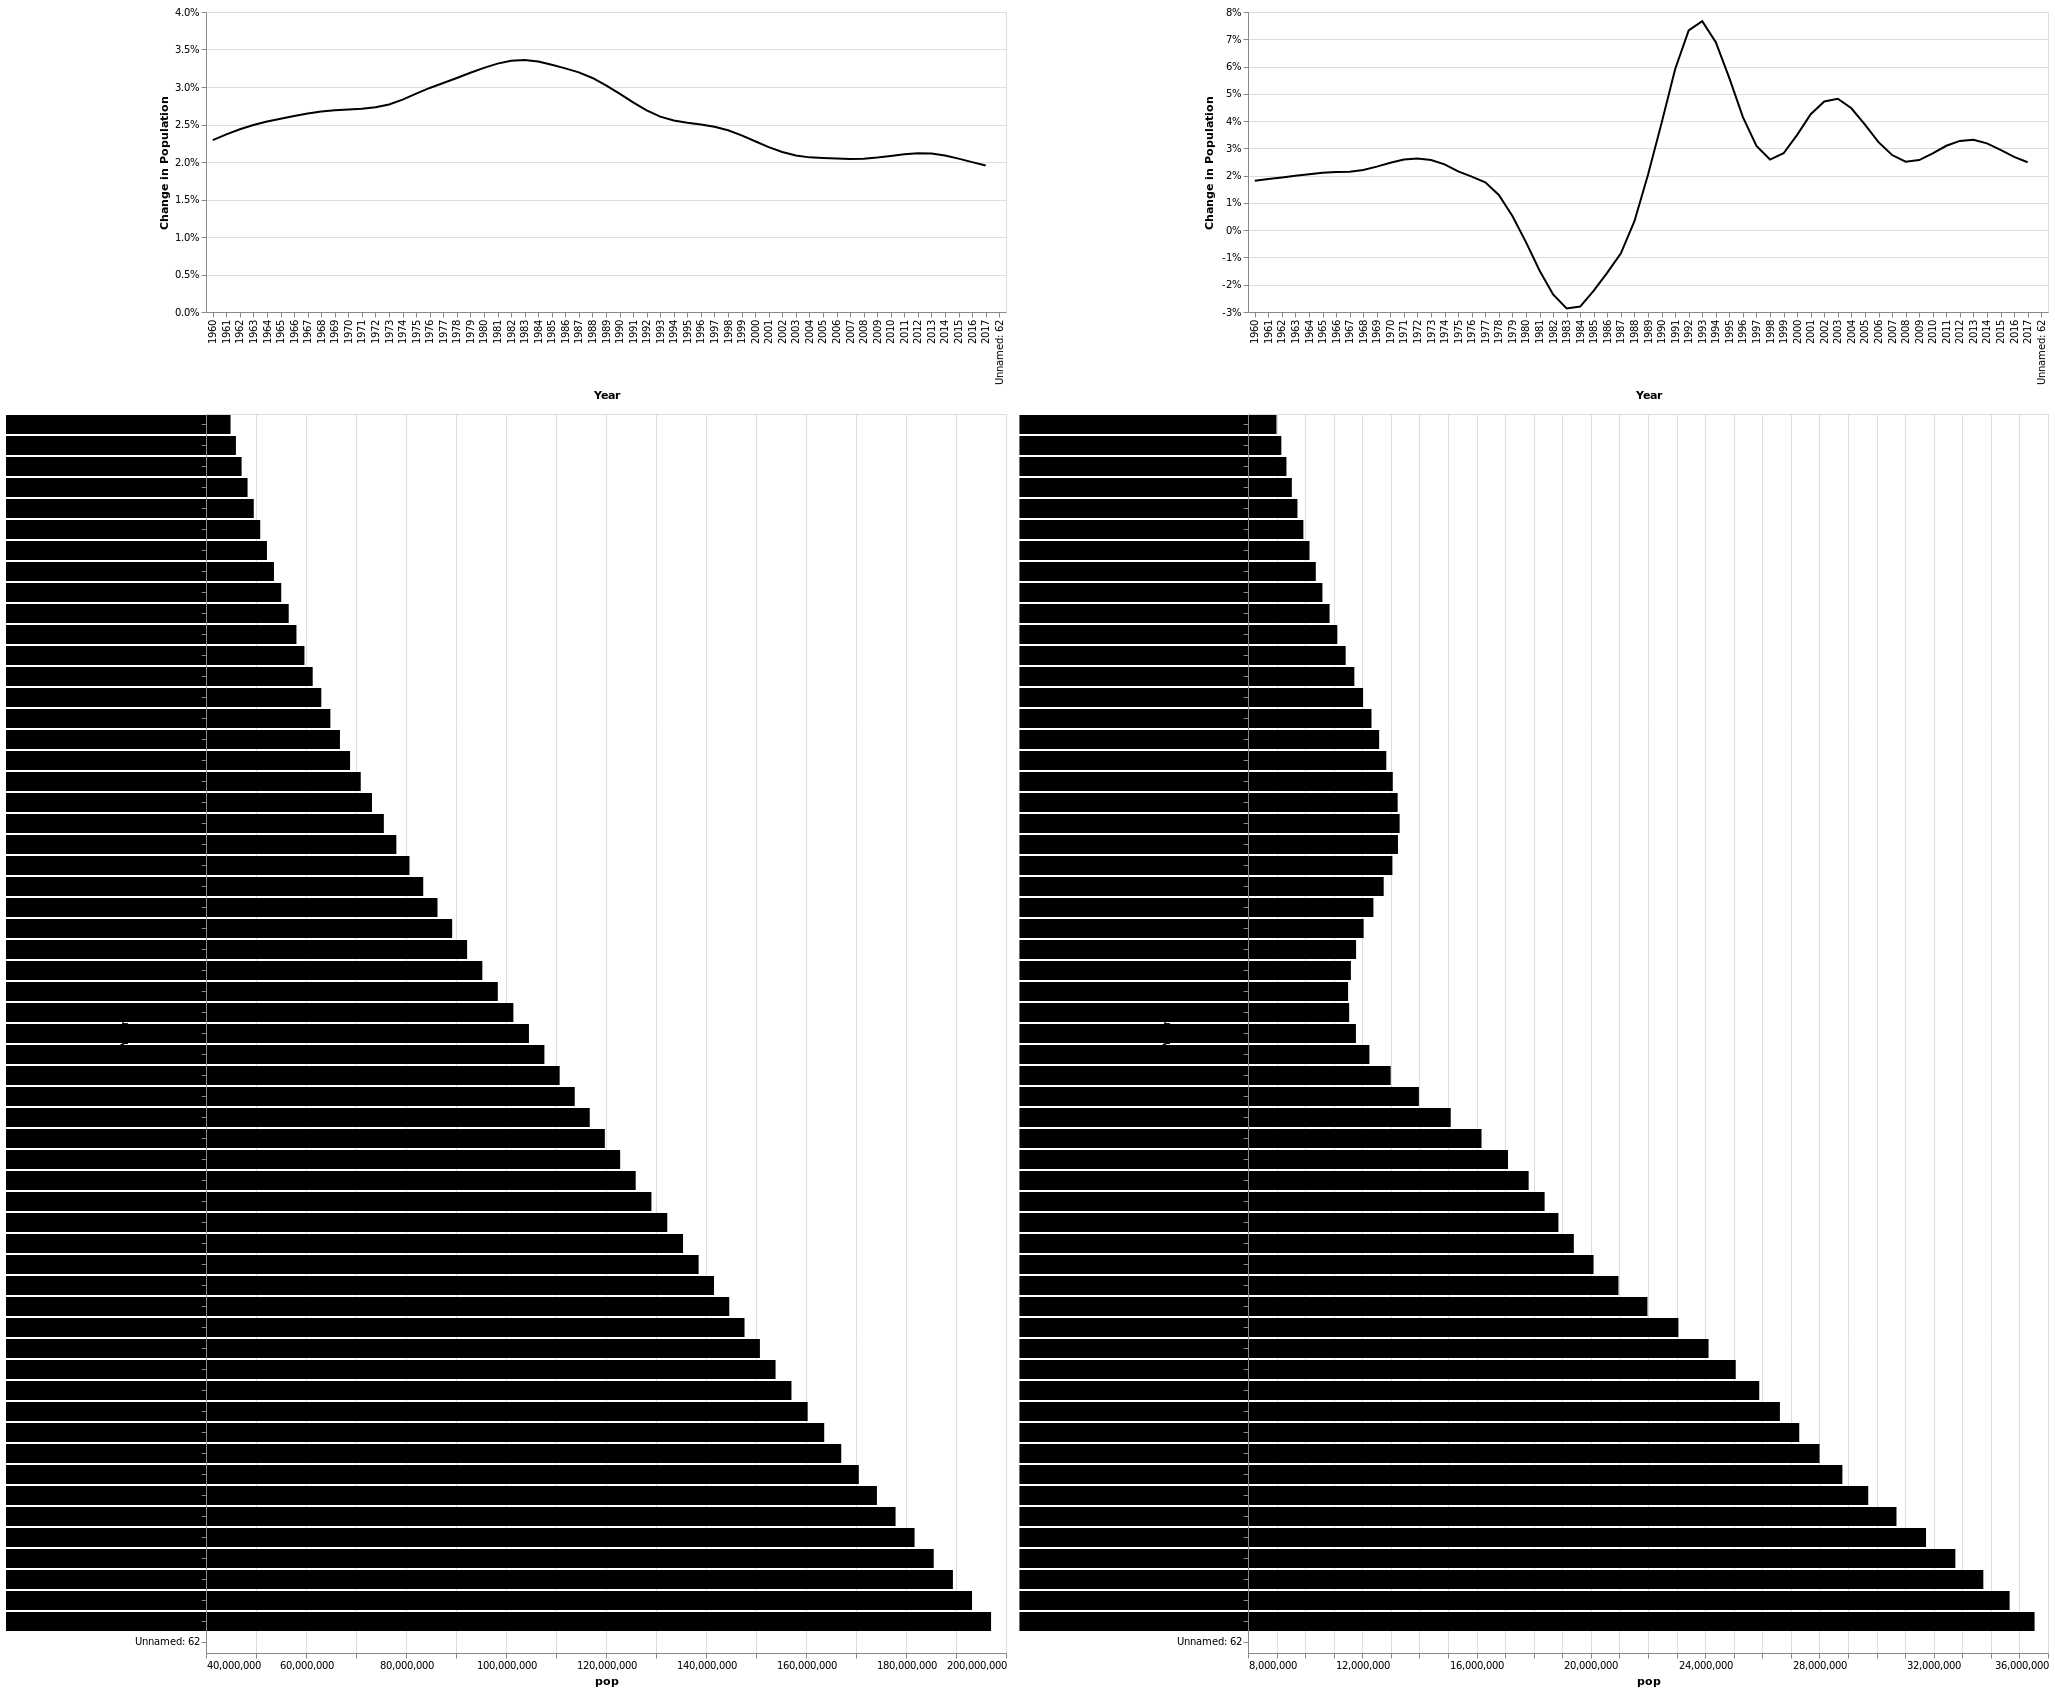

In [0]:
show_pop_w_delta(pop_and_delta('Pakistan')) | show_pop_w_delta(pop_and_delta('Afghanistan'))

    